### Principal Component Analysis
 
PCA is a statistical technique invented in 1901 by Karl Pearson that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables called Principal Components.

PCA is based on the Singular Value Decomposition(SVD) of the Covariance Matrix of the original dataset. The Eigenvectors of such decomposition are used as a rotation matrix. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its explained variance. This last term is related to the EigenValues of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

In [1]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

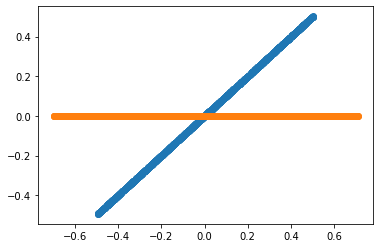

In [6]:
n = 1
x = np.random.uniform(1, 2, 1000)    # generate 1000 samples from a uniform random variable
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)    # center x. remove its mean
y = y - np.mean(y)    # center y. remove its mean

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data['x'], data['y'])

pca = PCA(n_components=2)    # choose to get 2 output variables

# create the transformation model for data. Internally, it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

# Transform the data base on the rotation matrix of pcaTr
rotatedData = pcaTr.transform(data) 

# create a data frame with the new variables
dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])

# plot the transformed data in orange
plt.scatter(dataPCA['PC1'], dataPCA['PC2'])
plt.show()

#### Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices.

- `pcaTr.components_` has the rotation matrix
- `pcaTr.explained_variance_` has the explained variance of each principal component

In [7]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.70058367e-01 7.12339505e-33]


$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y)  \ 0] = [0.0833 + 0.0833 \  0] = [0.166 \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 


#### Correlated Normal Random Variables

angle:  45.0
rotation matrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


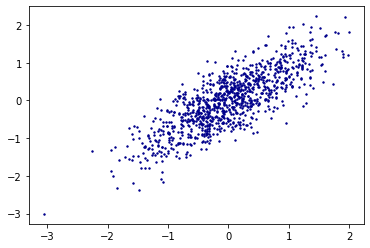

In [14]:
random.seed(100)

std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

x = x - np.mean(x)
y = y - np.mean(y)

n = 1    # magnitude of covariance
angle = np.arctan(1 / n)    # convert the covariance tn an angle
print('angle: ', angle * 180 / math.pi)

# create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                          [-np.sin(angle), np.cos(angle)]])

print('rotation matrix')
print(rotationMatrix)

xy = np.concatenate(([x], [y]), axis=0).T

# transform the data using the rotation matrix
data = np.dot(xy, rotationMatrix)

plt.scatter(data[:, 0], data[:, 1], s=2, c='darkblue')
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.6954455  -0.71857884]
 [ 0.71857884 -0.6954455 ]]

Eigenvalues or explained variance
[1.01295608 0.11116972]


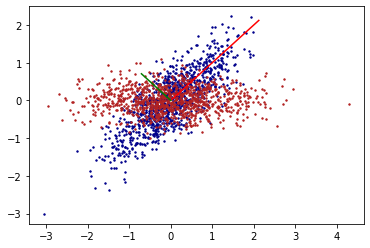

In [17]:
plt.scatter(data[:, 0], data[:, 1], s=2, c='darkblue')

# apply PCA 
pca = PCA(n_components=2)

pcaTr = pca.fit(data)

dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1], s=2, c='firebrick')

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 
         'k-', color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 
         'k-', color='green')

plt.show()

The explanation of this chart is as follows:
* The rotation matrix used to create our correlated variables took the original uncorrelated variables `x` and `y` and transformed them into the blue points.
* The PCA transformation finds out the rotation matrix used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our original uncorrelated variables.
* The explained Variance of the PCA is 

$$[1.0094, 0.1125] $$

which is approximately

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

the parameters of our original random variables x and y

You can use the previous code to try with other standard deviations and correlations and convince your self of this fact.   

## PCA as a strategy for dimensionality reduction

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that **generalize** the data. Nevertheless, for some applications, we are interested in the patterns that explain much less Variance, for example, in novelty detection. 

In the next figure, we can see the original data and its corresponding projection over the first and second principal components. In other words, data comprised of a single variable.

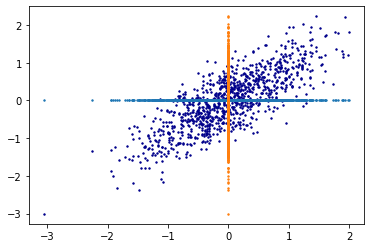

In [20]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1], s=2, c='darkblue')

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints), s=2)

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1], s=2)

plt.show()